<a href="https://colab.research.google.com/github/upadhyayprakash/eva4/blob/master/S9/Quiz_EVA4_Session_9_CIFAR10_RESNet18_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Session-9 QUIZ**

Make a DNN such that:

it's first block uses following code:
import datetime from datetime
print("Current Date/Time: ", datetime.now())
uses the Modules you have written
calls following DNN from a file called QuizDNN.py:
x1 = Input
x2 = Conv(x1)
x3 = Conv(x1 + x2)
x4 = MaxPooling(x1 + x2 + x3)
x5 = Conv(x4)
x6 = Conv(x4 + x5)
x7 = Conv(x4 + x5 + x6)
x8 = MaxPooling(x5 + x6 + x7)
x9 = Conv(x8)
x10 = Conv (x8 + x9)
x11 = Conv (x8 + x9 + x10)
x12 = GAP(x11)
x13 = FC(x12)
Uses ReLU and BN wherever applicable
Uses CIFAR10 as the dataset
Your target is 75% in less than 40 Epochs
Once Done:
Paste the code in QuizDNN.py
Paste the code of your Colab (or computer's) Notebook
Paste the complete training log
Paste the link to your Google Colab Notebook file (or you GitHub Repo)

#### **RESULT**
GitHub Source: https://github.com/upadhyayprakash/eva4/tree/master/S9

#### **Summary**

| Metric          | Values         |
| --------------- | -------------- |
| Network Arch.   | **QuizDNN(Custom DenseNet)**  |
| # of Epochs     | **8**         |
| # of Parameters | **299,018** |
| Final Accuracy  | **__.__%**    |
| Augmentation    | HorizFlip, ShiftScaleRotate, CLAHE, Sharpen, Emboss, RandomContrast, RandomBrightness |

#### Loading the Libraries

In [1]:
# Printing the Timestamp
from datetime import datetime
print("Current Date/Time: ", datetime.now())


# Setting up the module import directory
import sys
sys.path.append('/home/prakash/Prakash/EVA4/Session-9/Notebooks')

Current Date/Time:  2020-04-01 19:46:39.201473


In [0]:
# for inline graph plotting
%matplotlib inline

import torch
import torchvision
import torch.nn as nn
import torchvision.transforms as transforms
from torchsummary import summary

#### Checking if GPU(CUDA) is supported

In [3]:
cuda = torch.cuda.is_available() # returns True/False
print('GPU Available?', cuda)

# initiate the Network
device = torch.device("cuda" if cuda else "cpu")

GPU Available? True


#### Loading and Transforming the CIFAR10 Dataset

In [4]:
# MODULES: Train and Test Data Loaders modules
import data_loader
trainloader = data_loader.getTrainLoader('CIFAR10')
testloader = data_loader.getTestLoader('CIFAR10')

classes = data_loader.getClasses('CIFAR10')

print('Classes: ')
print(classes)

GPU Available? True
Files already downloaded and verified
Files already downloaded and verified
Classes: 
('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


#### Visualize the training data

Batch Grid


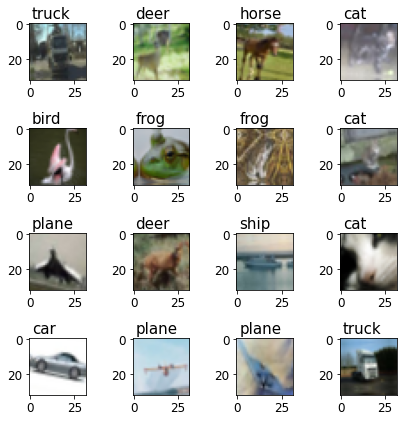

In [5]:
import visualize_data

visualize_data.visualize_batch(trainloader, classes)

### Creating the Network Object

In [7]:
# Loading the Network
# from network import Net
# from models.resnet import ResNet18
from models.QuizDNN import QuizDNN

net = QuizDNN().to(device)
summary(net, input_size=(3, 32, 32)) # Network Summary

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,792
              ReLU-2           [-1, 64, 32, 32]               0
       BatchNorm2d-3           [-1, 64, 32, 32]             128
            Conv2d-4           [-1, 64, 32, 32]          36,928
              ReLU-5           [-1, 64, 32, 32]               0
       BatchNorm2d-6           [-1, 64, 32, 32]             128
            Conv2d-7           [-1, 64, 32, 32]          36,928
              ReLU-8           [-1, 64, 32, 32]               0
       BatchNorm2d-9           [-1, 64, 32, 32]             128
        MaxPool2d-10           [-1, 64, 16, 16]               0
           Conv2d-11           [-1, 64, 16, 16]          36,928
             ReLU-12           [-1, 64, 16, 16]               0
      BatchNorm2d-13           [-1, 64, 16, 16]             128
           Conv2d-14           [-1, 64,

### Training Program

In [8]:
# Model Trainer
import model_trainer
EPOCHS = 8
# Training and Testing the model
traintestresult = model_trainer.fit_model(net, EPOCHS, device, trainloader, testloader, classes)
model = traintestresult['model']

EPOCH: 1
 [================================================================>]  Step: 54ms | Tot: 32s949ms | Train Loss: 1.524 | Train Acc: 44.576% (22288/50000) 391/391 
 [================================================================>]  Step: 30ms | Tot: 2s323ms | Test Loss: 1.250 | Test Acc: 54.090% (5409/10000) 79/79 
EPOCH: 2
 [================================================================>]  Step: 54ms | Tot: 32s486ms | Train Loss: 1.145 | Train Acc: 59.362% (29681/50000) 391/391 
 [================================================================>]  Step: 7ms | Tot: 2s391ms | Test Loss: 0.959 | Test Acc: 65.900% (6590/10000) 79/79 
EPOCH: 3
 [================================================================>]  Step: 54ms | Tot: 32s699ms | Train Loss: 0.969 | Train Acc: 65.710% (32855/50000) 391/391 
 [================================================================>]  Step: 7ms | Tot: 2s402ms | Test Loss: 0.852 | Test Acc: 69.310% (6931/10000) 79/79 
EPOCH: 4
 [================

### Training Evaluation
Visualizing Training and Testing Results

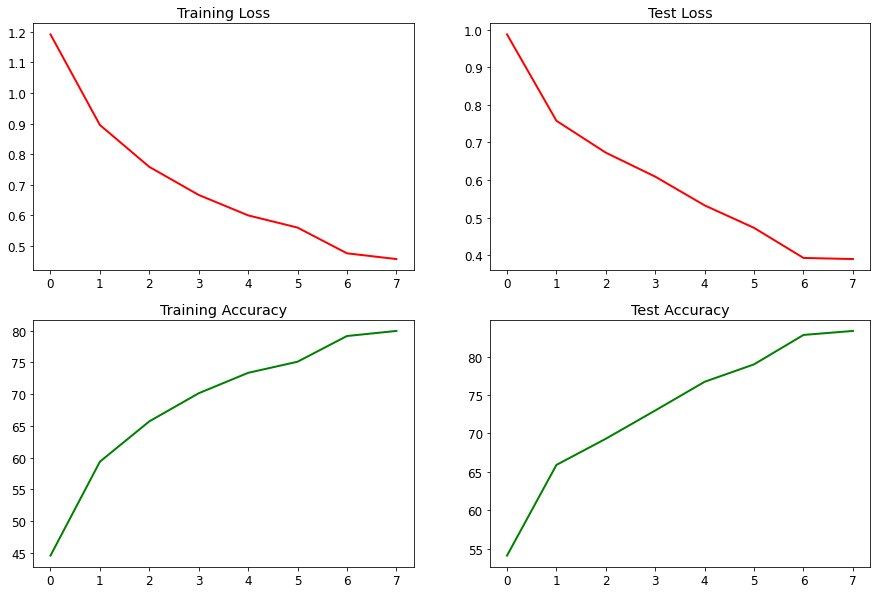

In [9]:
# extract the training/testing metrics
val_acc = traintestresult['val_acc']
val_loss = traintestresult['val_loss']
train_acc = traintestresult['train_acc']
train_loss = traintestresult['train_loss']

# visualize the training/testing stats
visualize_data.visualize_train_test_results(train_acc, train_loss, val_acc, val_loss)

### Class-wise Evaluation Result

Accuracy of plane : 80 %
Accuracy of   car : 96 %
Accuracy of  bird : 67 %
Accuracy of   cat : 61 %
Accuracy of  deer : 82 %
Accuracy of   dog : 65 %
Accuracy of  frog : 90 %
Accuracy of horse : 86 %
Accuracy of  ship : 91 %
Accuracy of truck : 91 %


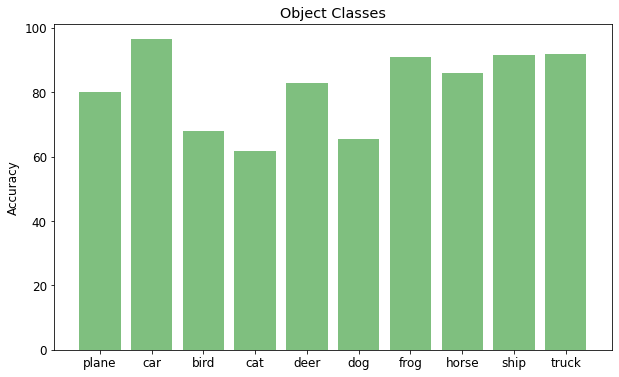

In [10]:
import class_wise_results

class_wise_results.show_class_wise_results(model, testloader, device, classes)

### Plotting Mis-classified Sample Objects

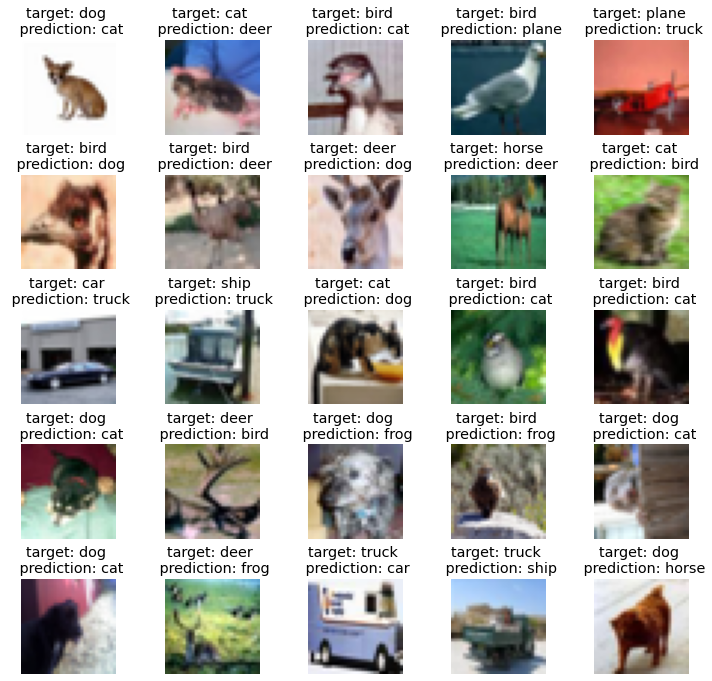

In [11]:
import misclassifieds
# Plotting mis-classified test
misclassifieds.plot_mis_classified_objects(model, device, classes, testloader)